<a href="https://colab.research.google.com/github/JoisIM/practicos_IA/blob/main/Lab2_Regr_lin_multivariable_Llave_Salas_%C3%81ngeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LABORATORIO #2: Reresión Linela Multivariable  
Llave Salas Ángeles Joana


In [1]:
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Para graficar en 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [19]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2- REGRESIÓN LINEAL CON MULTIVARIABLES
A continuación se implemente resgresión lineal multivariable para predecir de que manera se puede mantener el peso. La primera columna es la de edad, la segunda es el peso en kilogramos, la tercera es la altura en metros, la cuarta es la de genero, la quinta es IMC es decir es el índice de masa corporal, la sexta es BMR es la tasa metabólica basál, la séptima es nivel de actividades, la octava es calorías para mantener el peso, la novena es etiqueta de y la última es el peso mantenido.

2.1. NORMALIZACIÓN DE MULTIVARIABLES

In [25]:
import numpy as np
import pandas as pd

# Cargar los datos desde el archivo CSV y saltarse la primera columna
data = pd.read_csv('/content/gdrive/MyDrive/dataSets/diet_plan.csv', delimiter=',', skiprows=1)

X = data.iloc[:, :10]  # Select all rows and columns up to the 9th
y = data.iloc[:, 10]   # Select all rows and the 10th column
m = y.size

In [26]:
X.shape

(10725, 10)

In [27]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [30]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

           1   2  16.09786214997295  0.9320248764873583  F  \
0          2   4          14.619374            0.916687  F   
1          4   4          17.899918            0.997288  F   
2          6   3          13.532880            1.022786  F   
3          8   4          17.039484            1.053977  M   
4         10   3          12.032662            1.078630  F   
...      ...  ..                ...                 ... ..   
10720  23986  72          95.444236            1.631113  F   
10721  23988  85          97.976899            1.631409  F   
10722  23994  50          97.761259            1.631864  F   
10723  23997  57          96.829324            1.631290  F   
10724  23998  63          97.615186            1.633168  M   

       18.531611873353047   958.584  1.2  1150.3008  8  
0               17.397496   932.383  1.7  1585.0511  7  
1               17.997414   977.578  1.9  1857.3982  7  
2               12.936609   944.689  1.9  1794.9091  7  
3               15.338909  

In [31]:
import numpy as np
import pandas as pd

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Convert all columns of X to numeric, coercing errors to NaN
    X_norm = X_norm.apply(pd.to_numeric, errors='coerce')

    mu = np.mean(X_norm, axis=0) # Calculate mean on numeric data
    sigma = np.std(X_norm, axis=0)
    X_norm = (X_norm - mu) / sigma

    return X_norm, mu, sigma

In [32]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [33]:
print(X)

[[ 1.         -1.71180871 -1.25168996 ...  0.88695429 -1.3741838
  -1.66081261]
 [ 1.         -1.71151519 -1.25168996 ...  1.72164781 -0.67282384
  -1.66081261]
 [ 1.         -1.71122166 -1.3066347  ...  1.72164781 -0.83374845
  -1.66081261]
 ...
 [ 1.          1.80930546  1.27576831 ...  0.88695429  1.70586192
   0.98902602]
 [ 1.          1.80974575  1.66038152 ... -0.78243276 -0.11972062
   0.98902602]
 [ 1.          1.80989251  1.99004999 ... -1.19977952  0.08021893
   0.98902602]]


2. Descenso por la gradiente
Empleamos la formula:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$


In [34]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [35]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

3. Seleccionar coeficiente de aprendizaje

theta calculado por el descenso por el gradiente: [nan nan nan nan nan nan nan nan nan nan nan]


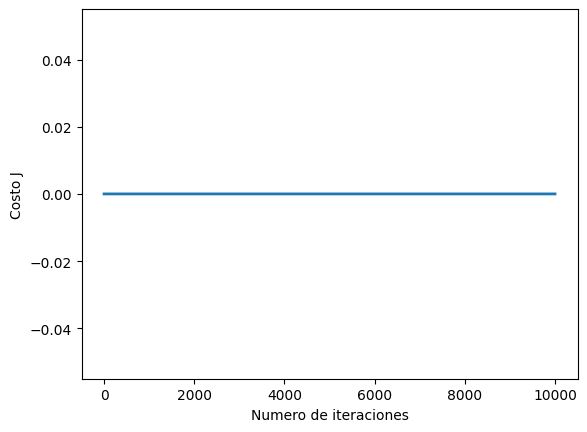

In [53]:
alpha = 0.003 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))



In [61]:
#  nuevo ejemplo para predecir basado en características
X_array = [ 1, 2000, 70, 50, 100, 30, 5, 60, 80, 200, 5]


X_array[1:11] = (X_array[1:11] - mu) / sigma
predicted_value = np.dot(X_array, theta)

print('El valor predecido para el nuevo conjunto de características es: {:.2f}'.format(predicted_value))

El valor predecido para el nuevo conjunto de características es: nan
